<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/Stochastic_Gradient_Descent_Imlementation_Optimizers_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We will try to implement Stochastic Gradient Descent , Momentum Stochastic Gradient Descent and Nagarov Accelerated Gradient Descent in Keras on Cifer-10 Dataset-**

**CIFER-10 Dataset-**

It is a image dataset which includes 60000 total images. IMage size is 32 * 32 pixel. There are 10 number of classes which means each image belongs to one of the class.

In [28]:
#importing the dependencies
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [29]:
#Loading the dataset
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [30]:
x_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [31]:
#Normalizing the pixel values in between 0 to 255
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [32]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Now defining a neural network model for Stochastic Gradient Descent

In [33]:
modelsgd = Sequential()
modelsgd.add(Flatten(input_shape=(32,32,3)))
modelsgd.add(Dense(512,activation='relu'),Dropout(0.5))
modelsgd.add(Dense(256,activation='relu'),Dropout(0.3))
modelsgd.add(Dense(10,activation='softmax'))

In [34]:
opt_sgd = SGD(learning_rate=0.01)
modelsgd.compile(optimizer=opt_sgd,loss='categorical_crossentropy',metrics=['accuracy'])
hissgd = modelsgd.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test),validation_split=0.3)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.2776 - loss: 2.0127 - val_accuracy: 0.3243 - val_loss: 1.9398
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3805 - loss: 1.7607 - val_accuracy: 0.3042 - val_loss: 1.9592
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4103 - loss: 1.6743 - val_accuracy: 0.3958 - val_loss: 1.6821
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4348 - loss: 1.6115 - val_accuracy: 0.3977 - val_loss: 1.7031
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.4466 - loss: 1.5675 - val_accuracy: 0.4208 - val_loss: 1.6230


Now defining a neural network model for Momentum Stochastic Gradient Descent

In [35]:
modelmom = Sequential()
modelmom.add(Flatten(input_shape=(32,32,3)))
modelmom.add(Dense(512,activation='relu'),Dropout(0.5))
modelmom.add(Dense(256,activation='relu'),Dropout(0.3))
modelmom.add(Dense(10,activation='softmax'))

In [36]:
optmom = SGD(learning_rate=0.01,momentum = 0.9)
modelmom.compile(optimizer=optmom,loss='categorical_crossentropy',metrics=['accuracy'])
hismom=modelmom.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test),validation_split=0.3)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.2895 - loss: 1.9586 - val_accuracy: 0.3845 - val_loss: 1.7288
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.4067 - loss: 1.6630 - val_accuracy: 0.4227 - val_loss: 1.6301
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4348 - loss: 1.5895 - val_accuracy: 0.4474 - val_loss: 1.5437
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4552 - loss: 1.5175 - val_accuracy: 0.4586 - val_loss: 1.5111
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4734 - loss: 1.4647 - val_accuracy: 0.4702 - val_loss: 1.4859


Now defining a neural network model for Nesterov Accelerated Gradient

In [37]:
modelnag = Sequential()
modelnag.add(Flatten(input_shape=(32,32,3)))
modelnag.add(Dense(512,activation='relu'),Dropout(0.5))
modelnag.add(Dense(256,activation='relu'),Dropout(0.3))
modelnag.add(Dense(10,activation='softmax'))

In [38]:
optnag = SGD(learning_rate=0.01)
modelnag.compile(optimizer=optnag,loss='categorical_crossentropy',metrics=['accuracy'])
hisnag=modelnag.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test),validation_split=0.3)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.2677 - loss: 2.0158 - val_accuracy: 0.3554 - val_loss: 1.7925
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.3764 - loss: 1.7683 - val_accuracy: 0.3639 - val_loss: 1.7477
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.4115 - loss: 1.6702 - val_accuracy: 0.4002 - val_loss: 1.6941
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.4322 - loss: 1.6167 - val_accuracy: 0.4010 - val_loss: 1.6609
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.4510 - loss: 1.5564 - val_accuracy: 0.4459 - val_loss: 1.5694


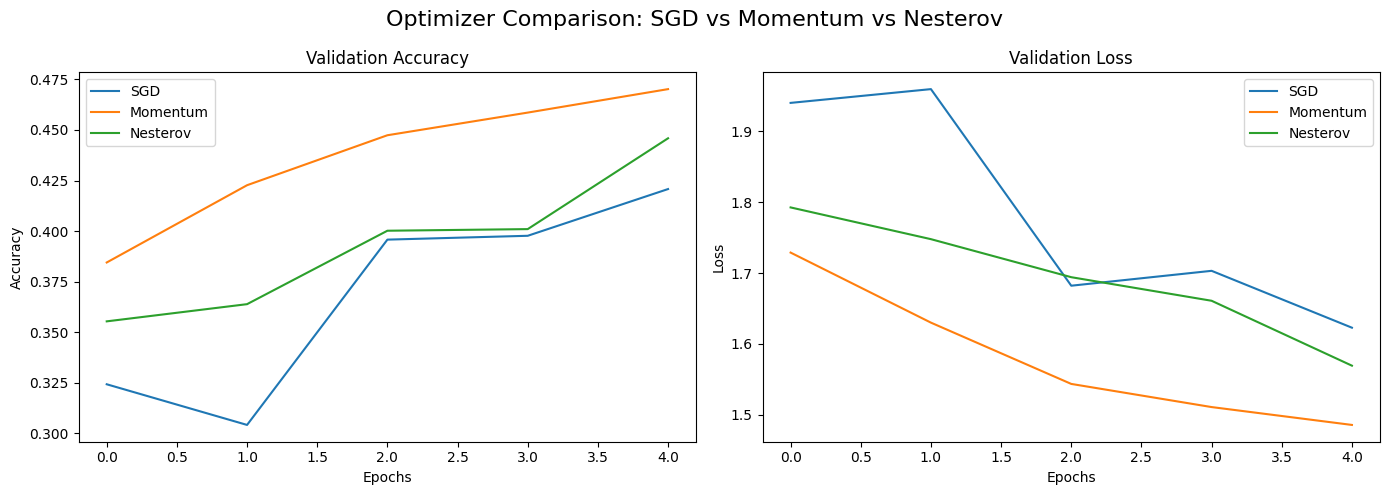

In [39]:
import matplotlib.pyplot as plt
histories = {
    'SGD': hissgd,
    'Momentum': hismom,
    'Nesterov': hisnag
}

# Plot Accuracy and Loss
plt.figure(figsize=(14, 5))

# 🔹 Validation Accuracy Plot
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name}')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 🔸 Validation Loss Plot
plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name}')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Optimizer Comparison: SGD vs Momentum vs Nesterov', fontsize=16)
plt.tight_layout()
plt.show()

Here from graph it is clear that momentum is working better than nesterov than sgd on validation data.

Loss of sgd is more than nesterov than momentum .

In [40]:
modelmom.evaluate(x_test,y_test)
#Here 1.4859 is loss value of test data and 0.4702 is the accuracy on test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4782 - loss: 1.4757


[1.485914945602417, 0.4702000021934509]

In [41]:
modelsgd.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4212 - loss: 1.6182


[1.6229596138000488, 0.42080000042915344]

In [42]:
modelnag.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4538 - loss: 1.5643


[1.5694290399551392, 0.44589999318122864]